In [2]:
#

import random
import math
import numpy as np
import matplotlib.pyplot as plt

thetaSet = [float(i) / 10 + 0.05 for i in range(10)]
def generateCost(theta):
    p = thetaSet[theta - 1]
    return np.random.binomial(1,p)
#Cost generator with Parameter theta

print thetaSet

[0.05, 0.15000000000000002, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.8500000000000001, 0.9500000000000001]


**************Initialzation**********
1
[[0], [0], [0], [0], [1], [1], [0], [1], [1], [0]]
**************Start Iteration**********
****************10000Step**********
[0.16666666666666666, 0.0, 0.16666666666666666, 0.2857142857142857, 0.33333333333333331, 0.5, 0.78787878787878785, 0.69565217391304346, 0.80555555555555558, 0.92063492063492058]
****************Pi_n**********
[0.03, 0.025, 0.03, 0.035, 0.045, 0.06, 0.165, 0.115, 0.18, 0.315]
****************regret**********
9.276


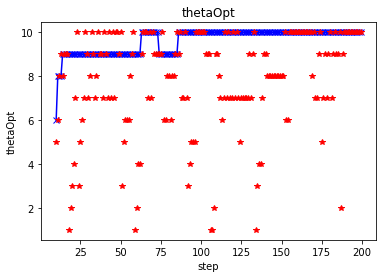

In [3]:
#UCB

#The Initialzation

Xi = 1.2
print '**************Initialzation**********'

c1 = map(generateCost,range(1,11))  # Generate c1(theta)
costRecord = [[c1[i]] for i in range(10)]
costRecordMean = map(np.mean,costRecord) # Compute c_hat_theta_n
m = map(len,costRecord) #Compute m_theta_n
B = max(np.array(costRecord).flatten())
print B
print costRecord
print '**************Start Iteration**********'

print '****************10000Step**********'
thetaOpt = [];
thetaGlobal = [];
N = 200
stepRange = range(10,N)
for n in stepRange:
    steplist = map(lambda x: costRecordMean[x] + B*math.sqrt(Xi * math.log(n)/m[x]),xrange(10))
    #thetaOptn, maxone = max(enumerate(map(lambda x: costRecordMean[x] + B*math.sqrt(Xi * math.log(n)/m[x]),xrange(10))));
    thetaOptn = steplist.index(max(steplist)) #find the max of costRecordMean[x] + B*math.sqrt(Xi * math.log(n)/m[x])
    thetaOpt.append(thetaOptn+1)
    costn = generateCost(thetaOptn+1) #Compute the cost of step n
    costRecord[thetaOptn].append(costn)
    
    #update c_hat_theta_n, m_theta_n, B
    
    costRecordMean = map(np.mean,costRecord) # Compute c_hat_theta_n
    m = map(len,costRecord) #Compute m_theta_n
    B = max(np.array(costRecord).flatten())[0]
    thetaGn = costRecordMean.index(max(costRecordMean))
    thetaGlobal.append(thetaGn+1)
    
print costRecordMean

print '****************Pi_n**********'
pi_m = [(float(i) / N) for i in m]
print pi_m
print '****************regret**********'
regret = (thetaGlobal[-1]  - sum([(pi_m[i] * thetaSet[i]) for i in range(10)]))
print regret

plt.plot(stepRange,thetaGlobal,'bx-')
plt.plot(stepRange,thetaOpt,'r*')

plt.xlabel('step')
plt.ylabel(u'thetaOpt')
plt.title(u'thetaOpt')
plt.show()

In [4]:
def binomialKi(p,q):
    if p == 0: 
        return(1-p)*math.log((1-p)/(1-q),2)
    if p == 1:
        return p*math.log(p/q,2)
    return p*math.log(p/q,2) + (1-p)*math.log((1-p)/(1-q),2)


qrange = [0.99 - float(i)/100 for i in range(100)] #the testing range of q
# Find the maximum q
def B_a_t(i,n,emperical):
    for q in qrange:
        Ki = binomialKi(emperical[i],q)
        if Ki < math.log(n,500):return q

**************Start Iteration**********
****************10000Step**********
[0.0, 0.0, 0.5, 0.0, 0.0, 0.5, 0.5, 0.75, 0.5, 0.95625000000000004]
****************Pi_n**********
[1, 1, 2, 1, 1, 2, 2, 28, 2, 160]
****************regret**********
0.57


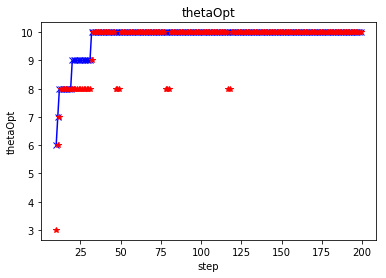

In [8]:
c1 = map(generateCost,range(1,11))  # Generate c1(theta)
costRecord = [[c1[i]] for i in range(10)]
costRecordMean = map(np.mean,costRecord) # Compute c_hat_theta_n
m = map(len,costRecord) #Compute m_theta_n
print '**************Start Iteration**********'

print '****************10000Step**********'
thetaOpt = [];
thetaGlobal = [];
N = 200
stepRange = range(10,N)
for n in stepRange:
    steplist = map(lambda x: B_a_t(x,n,costRecordMean),xrange(10))  #compute B_a_t for each arm
    thetaOptn = steplist.index(max(steplist)) #find the max of costRecordMean[x] + B*math.sqrt(Xi * math.log(n)/m[x])
    thetaOpt.append(thetaOptn+1)
    costn = generateCost(thetaOptn+1) #Compute the cost of step n
    costRecord[thetaOptn].append(costn)
    
    #update c_hat_theta_n, m_theta_n, B
    
    costRecordMean = map(np.mean,costRecord) # Compute c_hat_theta_n
    m = map(len,costRecord) #Compute m_theta_n
    B = max(np.array(costRecord).flatten())[0]
    thetaGn = costRecordMean.index(max(costRecordMean))
    thetaGlobal.append(thetaGn+1)
    
print costRecordMean

print '****************Pi_n**********'
pi_m = [(float(i) / N) for i in m]
print m
print '****************regret**********'
regret = (thetaGlobal[-1]  - sum([(pi_m[i] * (i+1)) for i in range(10)]))
print regret

plt.plot(stepRange,thetaGlobal,'bx-')
plt.plot(stepRange,thetaOpt,'r*')
plt.xlabel('step')
plt.ylabel(u'thetaOpt')
plt.title(u'thetaOpt')
plt.show()